Fold 1/5
Epoch 1/20, Loss: 1224023.2435064935, Accuracy: 0.005681818181818182, Val Loss: 1106770.4415584416, Val Accuracy: 0.006493506493506494
Epoch 2/20, Loss: 1224222.5714285714, Accuracy: 0.005681818181818182, Val Loss: 1106770.4415584416, Val Accuracy: 0.006493506493506494
Epoch 3/20, Loss: 1228200.0681818181, Accuracy: 0.005681818181818182, Val Loss: 1106770.4415584416, Val Accuracy: 0.006493506493506494
Epoch 4/20, Loss: 1225670.1331168832, Accuracy: 0.005681818181818182, Val Loss: 1106770.4415584416, Val Accuracy: 0.006493506493506494
Epoch 5/20, Loss: 1232058.5454545454, Accuracy: 0.005681818181818182, Val Loss: 1113481.0779220778, Val Accuracy: 0.006493506493506494
Epoch 6/20, Loss: 1239431.7532467532, Accuracy: 0.005681818181818182, Val Loss: 1131562.7272727273, Val Accuracy: 0.006493506493506494
Epoch 7/20, Loss: 1251867.1753246754, Accuracy: 0.005681818181818182, Val Loss: 1141989.87012987, Val Accuracy: 0.006493506493506494
Epoch 8/20, Loss: 1268450.831168831, Accuracy: 0

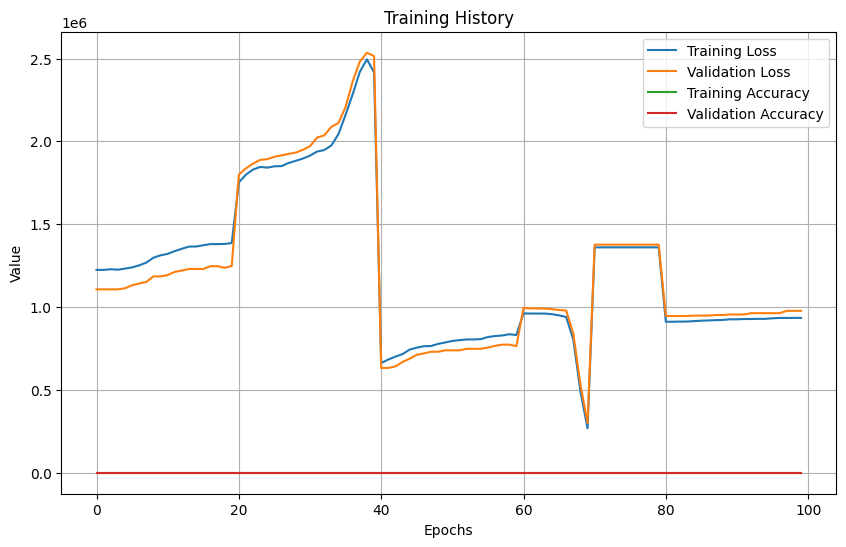

In [1]:
import os
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 Notebook의 경로 가져오기
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../utils")))
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../class")))

from data import preprocess_data
from Train import Train

# 데이터 섞는 함수
def shuffle_data(inputs, targets):
    indices = np.random.permutation(inputs.shape[0])  # 데이터 인덱스 섞기
    return inputs[indices], targets[indices]

# 실험 설정
csv_path = "../../../Data/font_data.csv"

train_instance = Train(
    epoch=20,
    batch=32,
    activation="relu",
    output_activation="softmax",
    weight_init="He",
    optimizer="adam",
    dropout=0.1,
    learning_rate=0.01,
)

# 데이터 로드
inputs, targets_one_hot, targets = train_instance.load_data(csv_path)

# 데이터 섞기
inputs, targets_one_hot = shuffle_data(inputs, targets_one_hot)

# K-Fold Cross Validation 준비
folds = train_instance.k_fold_split(inputs, targets_one_hot)

# 학습 실행
for i, (X_train, y_train, X_val, y_val) in enumerate(folds):
    print(f"Fold {i + 1}/{len(folds)}")
    train_instance.train(X_train, y_train, X_val, y_val)

# 결과 저장 및 시각화
train_instance.save_results(results_path="ReluHe.csv",weights_path="ReluHe_weights.csv")
train_instance.plot_history()